In [3]:
import numpy as np
from matplotlib import pyplot as plt
from keras.datasets import cifar10
from keras.models import load_model, Sequential
from sklearn.model_selection import train_test_split
import torchvision
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras.optimizers import SGD,Adam,RMSprop, Adagrad
import keras

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [5]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


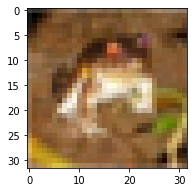

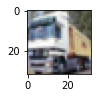

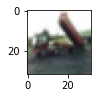

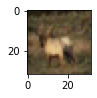

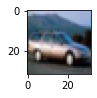

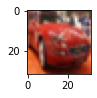

In [6]:
n = 6
plt.figure(figsize=(20,10))
for i in range(n):
    plt.subplot(330+1+i)
    plt.imshow(x_train[i])
    plt.show()

In [7]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255.0
x_test = x_test/255.0

In [8]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
print(y_test.shape)

(10000, 10)


In [9]:
from tensorflow.keras.optimizers import SGD
import keras
  
model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.5))
  
model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))
opt = Adam(lr=0.001)                        #optimizer=keras.optimizers.Adam()
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=opt, metrics=['accuracy'])

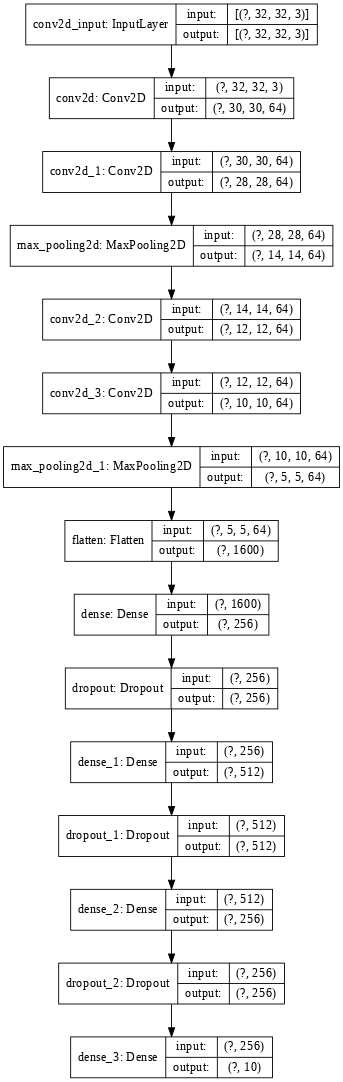

In [10]:
#model.summary()
keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True,
                                  rankdir='TB', expand_nested=True, dpi=64)

In [11]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
earlystop = EarlyStopping(patience = 10)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_loss', patience=2, verbose=1, factor=0.2, min_lr=0.00001)
callbacks = [earlystop, learning_rate_reduction]

checkpoint = ModelCheckpoint(filepath='cifar_adam_he_batch128_epoch12_callback_.h5', save_best_only=True, verbose=0)

In [12]:
%%time
batch_size = 8
epochs = 40
#history = model.fit(x_train, y_train, validation_split=0.1, epochs=epochs, batch_size=batch_size,callbacks=[checkpoint])
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=128, callbacks=callbacks)

Epoch 1/40
391/391 [==============================] - 10s 26ms/step - loss: 1.8236 - accuracy: 0.3038 - val_loss: 1.4894 - val_accuracy: 0.4458
Epoch 2/40
391/391 [==============================] - 10s 25ms/step - loss: 1.3240 - accuracy: 0.5224 - val_loss: 1.0965 - val_accuracy: 0.6146
Epoch 3/40
391/391 [==============================] - 10s 25ms/step - loss: 1.1069 - accuracy: 0.6122 - val_loss: 0.9676 - val_accuracy: 0.6648
Epoch 4/40
391/391 [==============================] - 10s 25ms/step - loss: 0.9799 - accuracy: 0.6620 - val_loss: 0.8934 - val_accuracy: 0.6897
Epoch 5/40
391/391 [==============================] - 10s 25ms/step - loss: 0.8836 - accuracy: 0.6963 - val_loss: 0.8485 - val_accuracy: 0.7075
Epoch 6/40
391/391 [==============================] - 10s 25ms/step - loss: 0.8228 - accuracy: 0.7177 - val_loss: 0.8162 - val_accuracy: 0.7192
Epoch 7/40
391/391 [==============================] - 10s 25ms/step - loss: 0.7713 - accuracy: 0.7347 - val_loss: 0.8011 - val_accuracy:

In [13]:
model.save('cifar_adam_he_batch128_epoch12_callback_.h5')

In [14]:
import keras
from matplotlib import pyplot as plt
def accuracy_plot(history):
    plt.figure(figsize=(15,8))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.grid()
    plt.show()

def loss_plot(history):
    plt.figure(figsize=(15,8))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.grid()
    plt.show()

1250/1250 [==============================] - 5s 4ms/step - loss: 0.7913 - accuracy: 0.7739


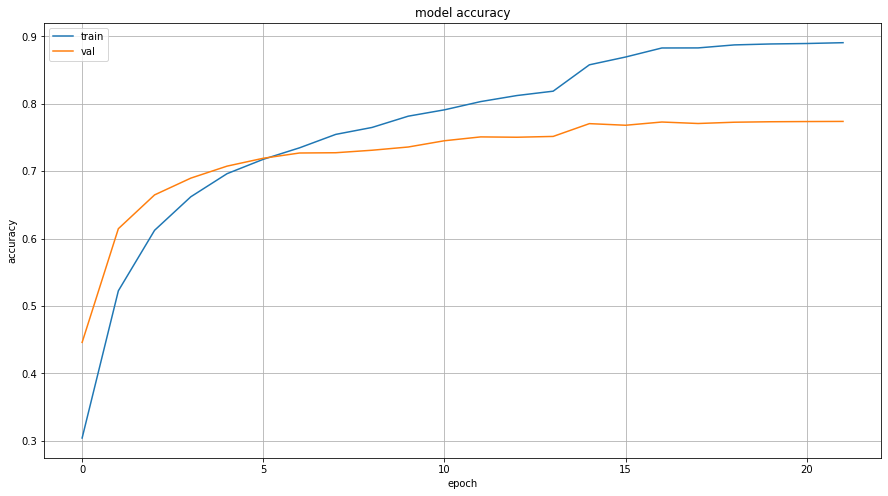

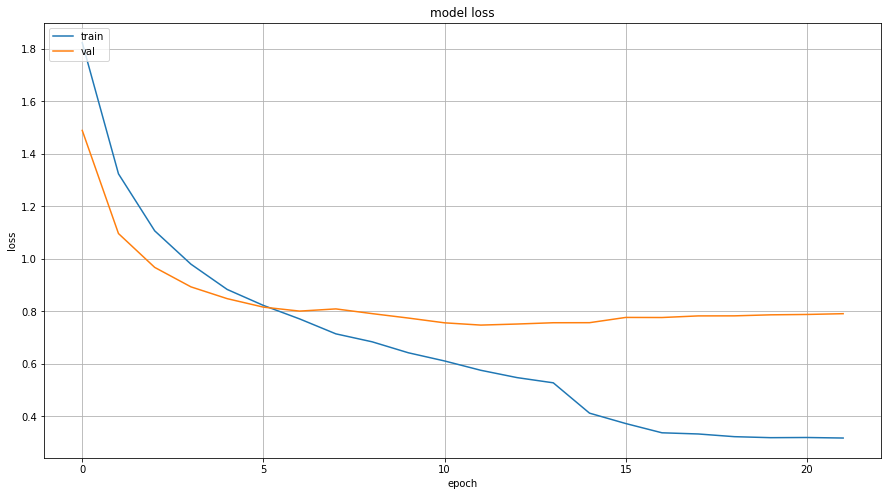

Accuracy on test data: 77.39%
Loss on test data: 0.79%


In [15]:
model.load_weights('cifar_adam_he_batch128_epoch12_callback_.h5')
(loss, accuracy) = model.evaluate(x_test, y_test, batch_size=8, verbose=1)
accuracy_plot(history)
loss_plot(history)
print('Accuracy on test data: {:.2f}%'.format(accuracy * 100))
print('Loss on test data: {:.2f}%'.format(loss))